### TUGAS PRAKTIKUM - MODUL 10 | IMPLEMENTASI *GREEDY BEST-FIRST SEARCH* | Menggunakan rumus *Euclidan Distance*

#### 1. GRAF EROPA

a. Import Library

In [41]:
import networkx as nx
import matplotlib.pyplot as plt
import math
from queue import PriorityQueue

b. Definisi Koordinat

In [42]:
# Data posisi kota
pos = {
    "Oradea": (1.5, 9.2),
    "Zerind": (1.3, 7.5),
    "Arad": (1.0, 6.0),
    "Timisoara": (1.0, 3.8),
    "Lugoj": (2.3, 3.5),
    "Mehadia": (2.7, 2.2),
    "Drobeta": (3.3, 1.0),
    "Craiova": (4.8, 2.0),
    "Rimnicu Vilcea": (4.5, 3.5),
    "Pitesti": (5.6, 3.1),
    "Sibiu": (3.2, 6.5),
    "Fagaras": (5.1, 6.5),
    "Bucharest": (6.7, 2.6),
    "Giurgiu": (6.8, 1.2),
    "Urziceni": (7.6, 3.5),
    "Hirsova": (8.8, 3.6),
    "Eforie": (9.5, 2.8),
    "Vaslui": (8.5, 5.2),
    "Iasi": (9.3, 6.4),
    "Neamt": (10.0, 7.5),
}



c. Definisi Graf & Edge Berbobot

In [43]:
# Buat graf tak berarah
G = nx.Graph()

# Bobot antar node (diambil dari graf)
edges = [
    ("Oradea", "Zerind", 71),
    ("Zerind", "Arad", 75),
    ("Arad", "Timisoara", 118),
    ("Arad", "Sibiu", 140),
    ("Oradea", "Sibiu", 151),
    ("Timisoara", "Lugoj", 111),
    ("Lugoj", "Mehadia", 70),
    ("Mehadia", "Drobeta", 75),
    ("Drobeta", "Craiova", 120),
    ("Craiova", "Rimnicu Vilcea", 146),
    ("Craiova", "Pitesti", 138),
    ("Rimnicu Vilcea", "Sibiu", 80),
    ("Rimnicu Vilcea", "Pitesti", 97),
    ("Sibiu", "Fagaras", 99),
    ("Fagaras", "Bucharest", 211),
    ("Pitesti", "Bucharest", 101),
    ("Bucharest", "Giurgiu", 90),
    ("Bucharest", "Urziceni", 85),
    ("Urziceni", "Hirsova", 98),
    ("Hirsova", "Eforie", 86),
    ("Urziceni", "Vaslui", 142),
    ("Vaslui", "Iasi", 92),
    ("Iasi", "Neamt", 87),
]
# Tambahkan ke graf
G.add_weighted_edges_from(edges)

d. Fungsi Heuristik (Euclidean Distance)

In [44]:
def euclidean_heuristic(a, goal):
    (x1, y1) = pos[a]
    (x2, y2) = pos[goal]
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

e. Implementasi Greedy Best-First Search

In [45]:
def greedy_best_first_search(graph, start, goal):
    visited = set()
    queue = PriorityQueue()
    queue.put((euclidean_heuristic(start, goal), start))
    came_from = {start: None}
    
    while not queue.empty():
        _, current = queue.get()
        
        if current == goal:
            break
        
        if current in visited:
            continue
        
        visited.add(current)
        
        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                if neighbor not in came_from:
                    came_from[neighbor] = current
                queue.put((euclidean_heuristic(neighbor, goal), neighbor))

    # Rekonstruksi jalur
    path = []
    current = goal
    while current:
        path.append(current)
        current = came_from.get(current)
    path.reverse()
    
    return path


f. Visualisasi Graf

Jalur hasil Greedy Best-First Search: ['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest']


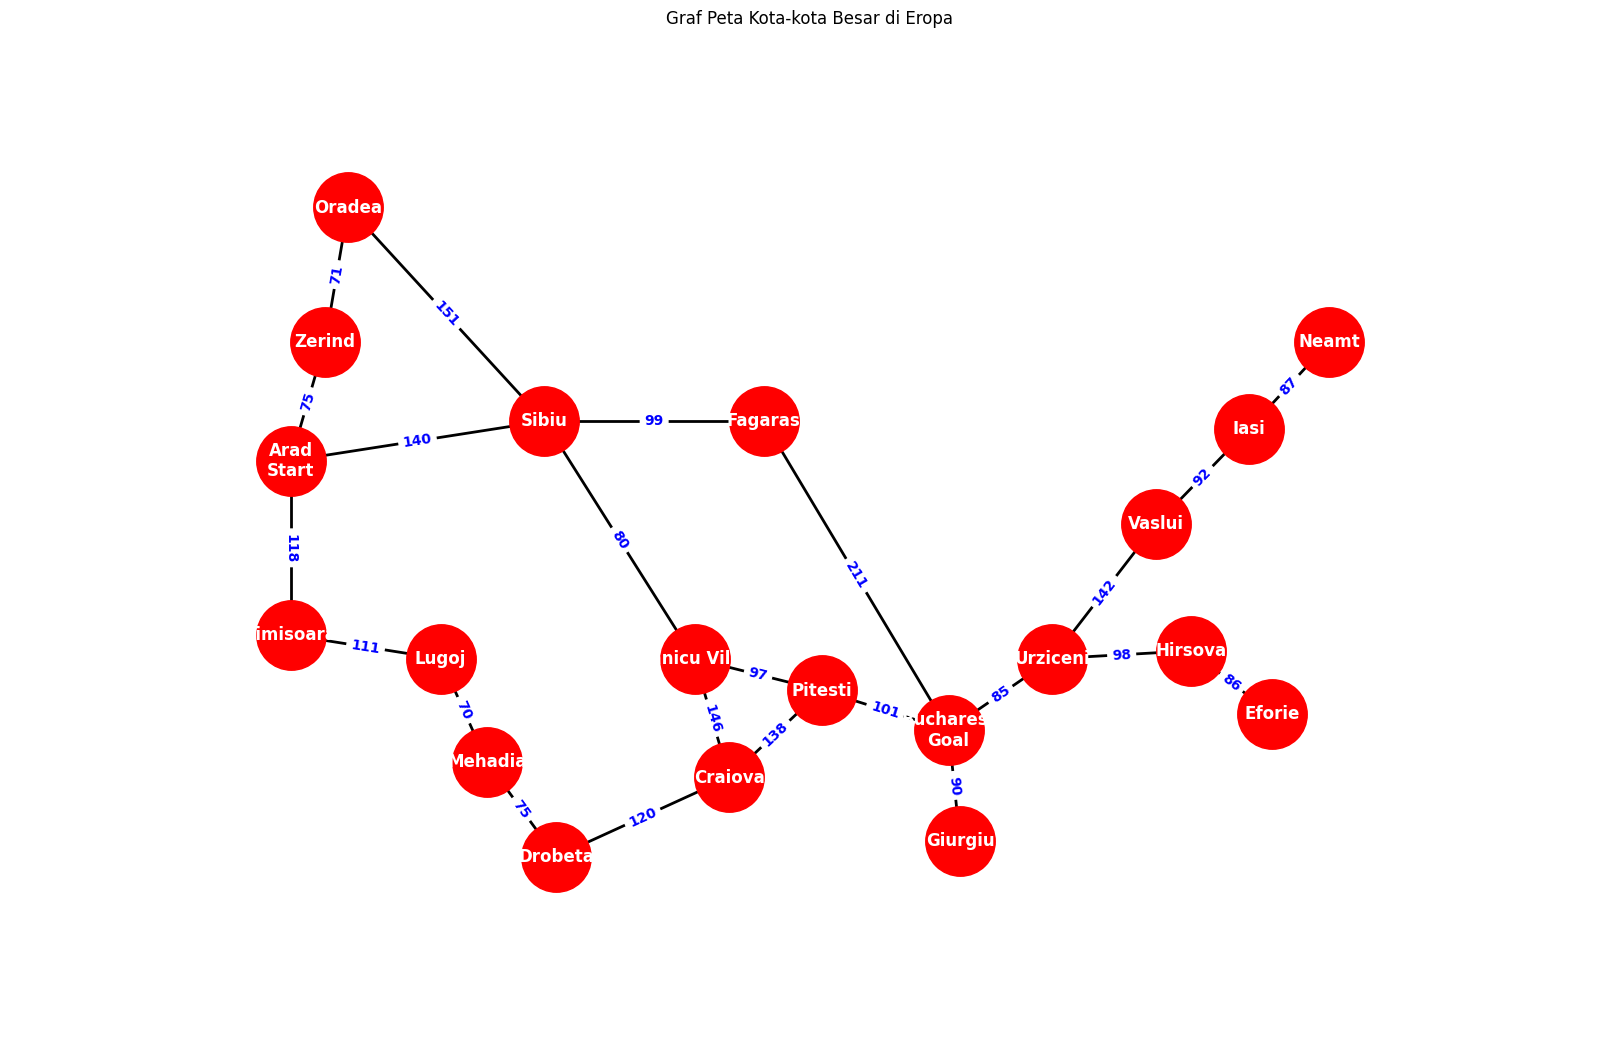

In [46]:
labels = {node: node for node in G.nodes()}
labels['Arad'] = 'Arad\nStart'
labels['Bucharest'] = 'Bucharest\nGoal'

def show_graph(G, pos=None, title='', labels={}):
    if pos is None:
        pos = nx.spring_layout(G)
    plt.figure(figsize=(16, 10))
    nx.draw(G, pos, with_labels=True, labels=labels, node_color='red',
            node_size=2500, font_color="white", font_weight="bold", width=2)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,
                                 font_color='blue', font_weight="bold", font_size=10)
    plt.margins(0.2)
    plt.title(title)
    plt.show()

# Eksekusi pencarian
path = greedy_best_first_search(G, 'Arad', 'Bucharest')
print("Jalur hasil Greedy Best-First Search:", path)

# Tampilkan graf
show_graph(G, pos=pos, labels=labels, title="Graf Peta Kota-kota Besar di Eropa")


#### 2. GRAF PULAU JAWA

a. Definisi Koordinat

In [47]:
pos = {
    "Jakarta": (0, 4),
    "Bandung": (2, 1),
    "Cirebon": (5.5, 3.5),
    "Semarang": (13, 3),
    "Yogyakarta": (12.5, 0),
    "Surakarta": (16.5, 1),
    "Surabaya": (25, 2.5),
    "Malang": (24, 0)
}

b. Definisi Graf & Edge Berbobot

In [48]:
# Buat graf tidak berarah
G = nx.Graph()
edges = [
    ("Jakarta", "Cirebon", 327),
    ("Jakarta", "Bandung", 270),
    ("Bandung", "Cirebon", 120),
    ("Cirebon", "Semarang", 305),
    ("Bandung", "Yogyakarta", 373),
    ("Cirebon", "Yogyakarta", 210),
    ("Semarang", "Yogyakarta", 109),
    ("Yogyakarta", "Surakarta", 60),
    ("Surakarta", "Semarang", 97),
    ("Surakarta", "Malang", 370),
    ("Semarang", "Surabaya", 369),
    ("Surabaya", "Malang", 94)
]
# Tambahkan ke graf
G.add_weighted_edges_from(edges)

c. Fungsi Heuristik (Euclidean Distance)

In [49]:
def euclidean_distance(pos1, pos2):
    x1, y1 = pos1
    x2, y2 = pos2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

goal = 'Malang'
heuristic = {}

for city in G.nodes():
    heuristic[city] = euclidean_distance(pos[city], pos[goal])


d. Visualisasi Graf

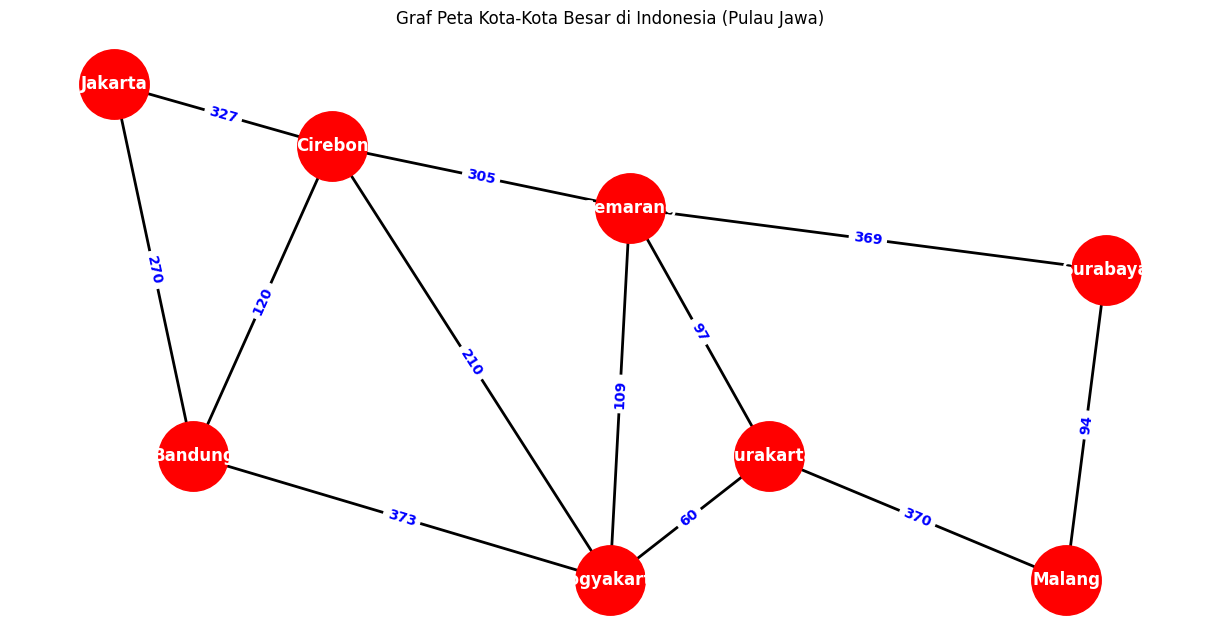

Heuristik (Jarak Euclidean ke Malang):
Jakarta: 24.33
Cirebon: 18.83
Bandung: 22.02
Semarang: 11.40
Yogyakarta: 11.50
Surakarta: 7.57
Malang: 0.00
Surabaya: 2.69


In [51]:
def show_graph(G, pos, title='', labels={}):
    # Gambar graf
    plt.figure(figsize=(12, 6))
    nx.draw(
        G, pos,
        with_labels=True,
        node_color='red',
        node_size=2500,
        font_color="white",
        font_weight="bold",
        width=2
    )
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(
        G,
        pos,
        edge_labels=edge_labels,
        font_color='blue',
        font_weight="bold",
        font_size=10
    )
    plt.title(title)
    plt.show()

labels = {node: node for node in G.nodes()}
labels['Bandung'] = 'Bandung\nStart'
labels['Malang'] = 'Malang\nGoal'

show_graph(G, pos, title="Graf Peta Kota-Kota Besar di Indonesia (Pulau Jawa)", labels=labels)

#  Eksekusi Tabel Heuristik (Ke Malang)
print("Heuristik (Jarak Euclidean ke Malang):")
for city, h in heuristic.items():
    print(f"{city}: {h:.2f}")

